In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AW_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0
1,NaN,0.28,0.50,0.0,0.14,NaN,0.21,0.07,NaN,NaN,...,0.0,0.0,NaN,NaN,0.372,NaN,NaN,NaN,101.0,NaN
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0
3,NaN,NaN,0.00,0.0,1.85,0.00,NaN,1.85,NaN,0.00,...,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,NaN,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,NaN,0.00,0.64,NaN,0.00,0.00,NaN,0.00,NaN,0.00,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,15.0,NaN
4593,NaN,NaN,0.00,0.0,0.00,0.00,NaN,0.00,NaN,0.00,...,0.0,NaN,NaN,0.0,0.000,NaN,0.0,NaN,NaN,70.0
4594,NaN,0.00,0.00,0.0,NaN,0.00,0.00,0.00,0.00,0.00,...,0.0,NaN,NaN,0.0,NaN,0.000,NaN,NaN,12.0,NaN
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.0,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	588
float64		column 2	240
float64		column 3	116
float64		column 4	406
float64		column 5	232
float64		column 6	580
float64		column 7	762
float64		column 8	348
float64		column 9	1168
float64		column 10	580
float64		column 11	522
float64		column 12	290
float64		column 13	58
float64		column 14	580
float64		column 15	1226
float64		column 16	638
float64		column 17	754
float64		column 18	928
float64		column 19	406
float64		column 20	1160
float64		column 21	994
float64		column 22	348
float64		column 23	1052
float64		column 24	1052
float64		column 25	1574
float64		column 26	1400
float64		column 27	174
float64		column 28	1450
float64		column 29	1458
float64		column 30	1574
float64		column 31	1458
float64		column 32	1516
float64		column 33	232
float64		column 34	1864
float64		column 35	1574
float64		column 36	1864
float64		column 37	878
float64		column 38	530
float64		column 39	986
float64		column 40	1748
float64		column 41	406
float64		colu

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4009.000000,4357.000000,4481.000000,4191.000000,4365.000000,4017.000000,3835.000000,4249.000000,3429.000000,4017.000000,...,4307.000000,3197.000000,3255.000000,3785.000000,3553.000000,3197.000000,3321.000000,3081.000000,3429.000000,3205.000000
mean,0.104163,0.219018,0.280870,0.065803,0.311766,0.096348,0.113419,0.102090,0.088489,0.239422,...,0.032672,0.038313,0.137831,0.017137,0.270127,0.073446,0.046361,4.909854,47.603091,275.516069
std,0.307443,1.323920,0.505667,1.429490,0.671028,0.277832,0.391666,0.392969,0.283605,0.659195,...,0.293064,0.237537,0.238768,0.113449,0.860619,0.240226,0.481968,30.026790,120.932705,607.553401
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.291000,15.000000,97.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.140000,...,0.000000,0.000000,0.188000,0.000000,0.322000,0.048000,0.000000,3.732000,42.000000,263.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.367000,5.277000,4.081000,32.478000,5.300000,19.829000,1021.500000,2042.000000,15841.000000


<AxesSubplot:>

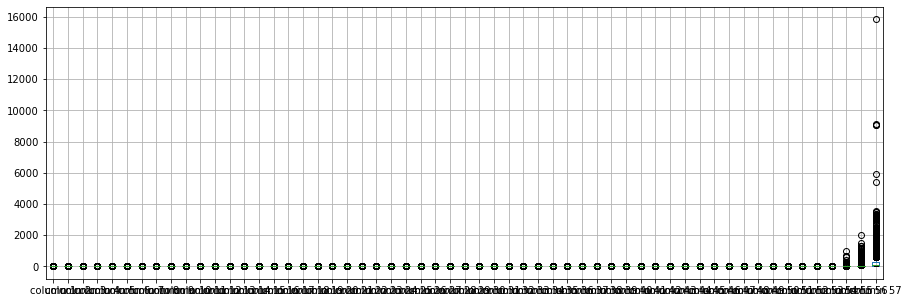

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104163
column 2       0.219018
column 3       0.280870
column 4       0.065803
column 5       0.311766
column 6       0.096348
column 7       0.113419
column 8       0.102090
column 9       0.088489
column 10      0.239422
column 11      0.058677
column 12      0.537321
column 13      0.094056
column 14      0.057354
column 15      0.047834
column 16      0.256206
column 17      0.141392
column 18      0.180346
column 19      1.667428
column 20      0.083733
column 21      0.802800
column 22      0.110200
column 23      0.100612
column 24      0.089927
column 25      0.581254
column 26      0.280629
column 27      0.768888
column 28      0.132469
column 29      0.108522
column 30      0.111429
column 31      0.067410
column 32      0.051162
column 33      0.099246
column 34      0.051643
column 35      0.106368
column 36      0.101149
column 37      0.139075
column 38      0.010022
column 39      0.079153
column 40      0.066413
column 41      0.045183
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016693,0.070242,0.027183,0.023299,0.066442,0.011687,-0.006409,0.082914,0.029745,...,-0.015615,-0.027332,-0.015414,-0.033840,0.057337,0.109570,-0.012665,0.045800,0.094958,0.072982
column 2,-0.016693,1.000000,-0.034596,-0.006473,-0.029457,-0.028809,-0.001022,-0.015529,0.002518,0.027392,...,-0.016420,-0.007009,-0.054952,-0.017083,-0.017888,-0.016135,0.003613,-0.002226,0.007189,-0.022321
column 3,0.070242,-0.034596,1.000000,-0.019758,0.078601,0.076530,0.032743,0.018103,0.082950,0.017079,...,-0.028305,-0.038223,-0.012893,-0.038889,0.096147,0.076599,0.000475,0.087677,0.160930,0.049255
column 4,0.027183,-0.006473,-0.019758,1.000000,0.004151,-0.006419,0.027719,0.012287,0.018202,-0.004562,...,-0.001163,0.005342,-0.007513,-0.006772,-0.002382,0.003554,-0.001979,0.006286,0.043264,0.020765
column 5,0.023299,-0.029457,0.078601,0.004151,1.000000,0.039577,0.139474,0.034185,0.008879,0.032292,...,-0.029327,-0.033382,-0.056580,-0.026172,0.020854,0.040653,-0.006914,0.063849,0.095673,-0.006726
column 6,0.066442,-0.028809,0.076530,-0.006419,0.039577,1.000000,0.051023,0.065697,0.089162,-0.000801,...,-0.031224,-0.023399,0.002026,-0.022213,0.065066,0.080926,0.040462,-0.011788,0.110341,0.063798
column 7,0.011687,-0.001022,0.032743,0.027719,0.139474,0.051023,1.000000,0.034935,0.003252,0.033154,...,-0.030856,-0.032932,-0.063049,-0.029187,0.045821,0.077653,0.037508,0.026490,0.080507,-0.013269
column 8,-0.006409,-0.015529,0.018103,0.012287,0.034185,0.065697,0.034935,1.000000,0.101225,0.085635,...,-0.023280,-0.025940,-0.042885,-0.016293,0.034069,0.050895,-0.006742,0.006854,0.066545,0.032691
column 9,0.082914,0.002518,0.082950,0.018202,0.008879,0.089162,0.003252,0.101225,1.000000,0.105907,...,-0.028219,-0.015619,-0.037686,0.011548,0.030455,0.152240,-0.001699,0.113361,0.271906,0.264233
column 10,0.029745,0.027392,0.017079,-0.004562,0.032292,-0.000801,0.033154,0.085635,0.105907,1.000000,...,-0.014462,0.021192,0.005955,0.008461,0.018999,0.063958,0.040123,0.061752,0.136270,0.078782


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 448.30913317743494
Epoch: 1 , loss: 441.7430252979026
Epoch: 2 , loss: 445.2782976369825
Epoch: 3 , loss: 441.2025627242563
Epoch: 4 , loss: 438.90768355525745
Epoch: 5 , loss: 440.08255781113894
Epoch: 6 , loss: 437.90564895257717
Epoch: 7 , loss: 439.11620641834645
Epoch: 8 , loss: 441.87337384905135
Epoch: 9 , loss: 436.28317186309073
Epoch: 10 , loss: 430.4567010859579
Epoch: 11 , loss: 387.1885913091254
Epoch: 12 , loss: 347.7680116979087
Epoch: 13 , loss: 325.1635318051647
Epoch: 14 , loss: 310.0729416637886
Epoch: 15 , loss: 304.2545283247785
Epoch: 16 , loss: 296.39827988787397
Epoch: 17 , loss: 311.185620749869
Epoch: 18 , loss: 291.1727474624687
Epoch: 19 , loss: 290.5916914989724
Epoch: 20 , loss: 296.60739514553586
Epoch: 21 , loss: 287.07192640935915
Epoch: 22 , loss: 300.46899723757434
Epoch: 23 , loss: 274.2316351169493
Epoch: 24 , loss: 281.139097433057
Epoch: 25 , loss: 288.14681754295

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.211866,0.000000,0.0,0.000000,0.000000,-0.535575,0.000000,0.0,-0.022585,-0.53138,...,0.0,0.000000,-0.520674,0.147558,0.000000,0.385732,0.055613,-2.887107,0.000000,-721.244202
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.086455,-0.004149,0.0,0.000000,0.000000,0.000000,0.114536,0.0,0.078283,0.00000,...,0.0,-0.035149,-0.166887,0.000000,0.000000,0.061182,0.000000,-1.934755,-5.961715,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.005686,0.000000,0.0,0.080175,0.000000,0.000000,-0.000574,0.0,-0.049160,0.00000,...,0.0,0.085582,-0.303584,0.000000,-0.941234,0.220311,0.000000,-0.705349,0.000000,-7.899292
4593,0.032602,0.017190,0.0,0.000000,0.000000,0.000000,0.098132,0.0,0.008993,0.00000,...,0.0,-0.007539,0.092432,0.000000,0.000000,0.068382,0.000000,-1.357913,-7.041991,0.000000
4594,0.138859,0.000000,0.0,0.000000,0.184499,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,-0.035055,-0.236825,0.000000,0.245612,0.000000,-0.368202,0.369547,0.000000,69.040680
4595,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

26056.308187161852

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.549031760490032

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.926306
column 6      -0.035824
column 7      -0.605081
column 8       0.000000
column 9      -0.252268
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15     -0.692546
column 16      0.440000
column 17      0.000000
column 18      0.470965
column 19      2.240000
column 20      0.878336
column 21      1.912769
column 22      0.000000
column 23      0.000000
column 24     -0.364864
column 25      0.000000
column 26      1.223724
column 27     -0.928702
column 28      0.816216
column 29      0.426328
column 30      1.435550
column 31      0.192315
column 32      0.399875
column 33      0.000000
column 34      0.245974
column 35      1.505715
column 36      0.172679
column 37      0.000000
column 38      0.000000
column 39      0.092016
column 40      0.062984
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.64,0.000000,0.320000,0.000000,0.000000,0.00,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.778000,0.000000,0.000000,3.756000,61.000000,278.000000
1,-0.001866,0.280000,0.50,0.000000,0.140000,-0.255575,0.210000,0.07,-0.022585,0.40862,...,0.0,0.000000,-0.388674,0.147558,0.372000,0.565732,0.103613,2.226893,101.000000,306.755798
2,0.000000,0.000000,0.00,0.000000,0.630000,0.000000,0.310000,0.63,0.310000,0.63000,...,0.0,0.000000,0.135000,0.000000,0.135000,0.000000,0.000000,3.537000,40.000000,191.000000
3,0.086455,-0.004149,0.00,0.000000,1.850000,0.000000,0.114536,1.85,0.078283,0.00000,...,0.0,-0.035149,0.056113,0.000000,0.000000,0.061182,0.000000,1.065245,9.038285,54.000000
4,0.000000,0.000000,0.00,0.000000,1.920000,0.000000,0.000000,0.00,0.000000,0.64000,...,0.0,0.000000,0.054000,0.000000,0.164000,0.054000,0.000000,1.671000,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.005686,0.000000,0.64,0.080175,0.000000,0.000000,-0.000574,0.00,-0.049160,0.00000,...,0.0,0.085582,0.044416,0.000000,0.218766,0.220311,0.000000,2.415651,15.000000,95.100708
4593,0.032602,0.017190,0.00,0.000000,0.000000,0.000000,0.098132,0.00,0.008993,0.00000,...,0.0,-0.007539,0.092432,0.000000,0.000000,0.068382,0.000000,1.685087,7.958009,70.000000
4594,0.138859,0.000000,0.00,0.000000,0.184499,0.000000,0.000000,0.00,0.000000,0.00000,...,0.0,-0.035055,-0.100825,0.000000,0.245612,0.000000,0.040798,2.206547,12.000000,137.040680
4595,0.170000,0.000000,0.68,0.000000,0.340000,0.340000,0.000000,0.00,0.000000,0.00000,...,0.0,0.000000,0.032000,0.000000,0.065000,0.000000,0.000000,1.189000,5.000000,69.000000


In [ ]:
imputations[-1].to_excel("Spam_AW_1(imp).xlsx", index=False, header=False)